Importing the Required Libraries:

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

Reading the data:

In [2]:
data = pd.read_csv('plant_disease_dataset.csv')

data.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


Splitting the data into training and test sets:

In [3]:
X = data.values[:, 0:4]
Y = data.values[:, 4]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Training the model:

In [4]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.5
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Testing the model, and checking results.

Accuracy: 83.36666666666666
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      2274
         1.0       0.74      0.48      0.58       726

    accuracy                           0.83      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.82      0.83      0.82      3000



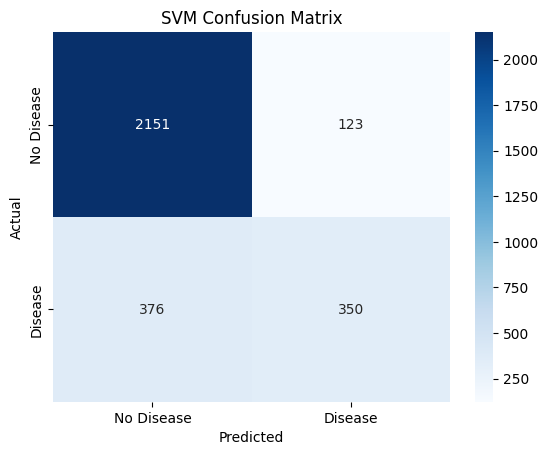

In [5]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

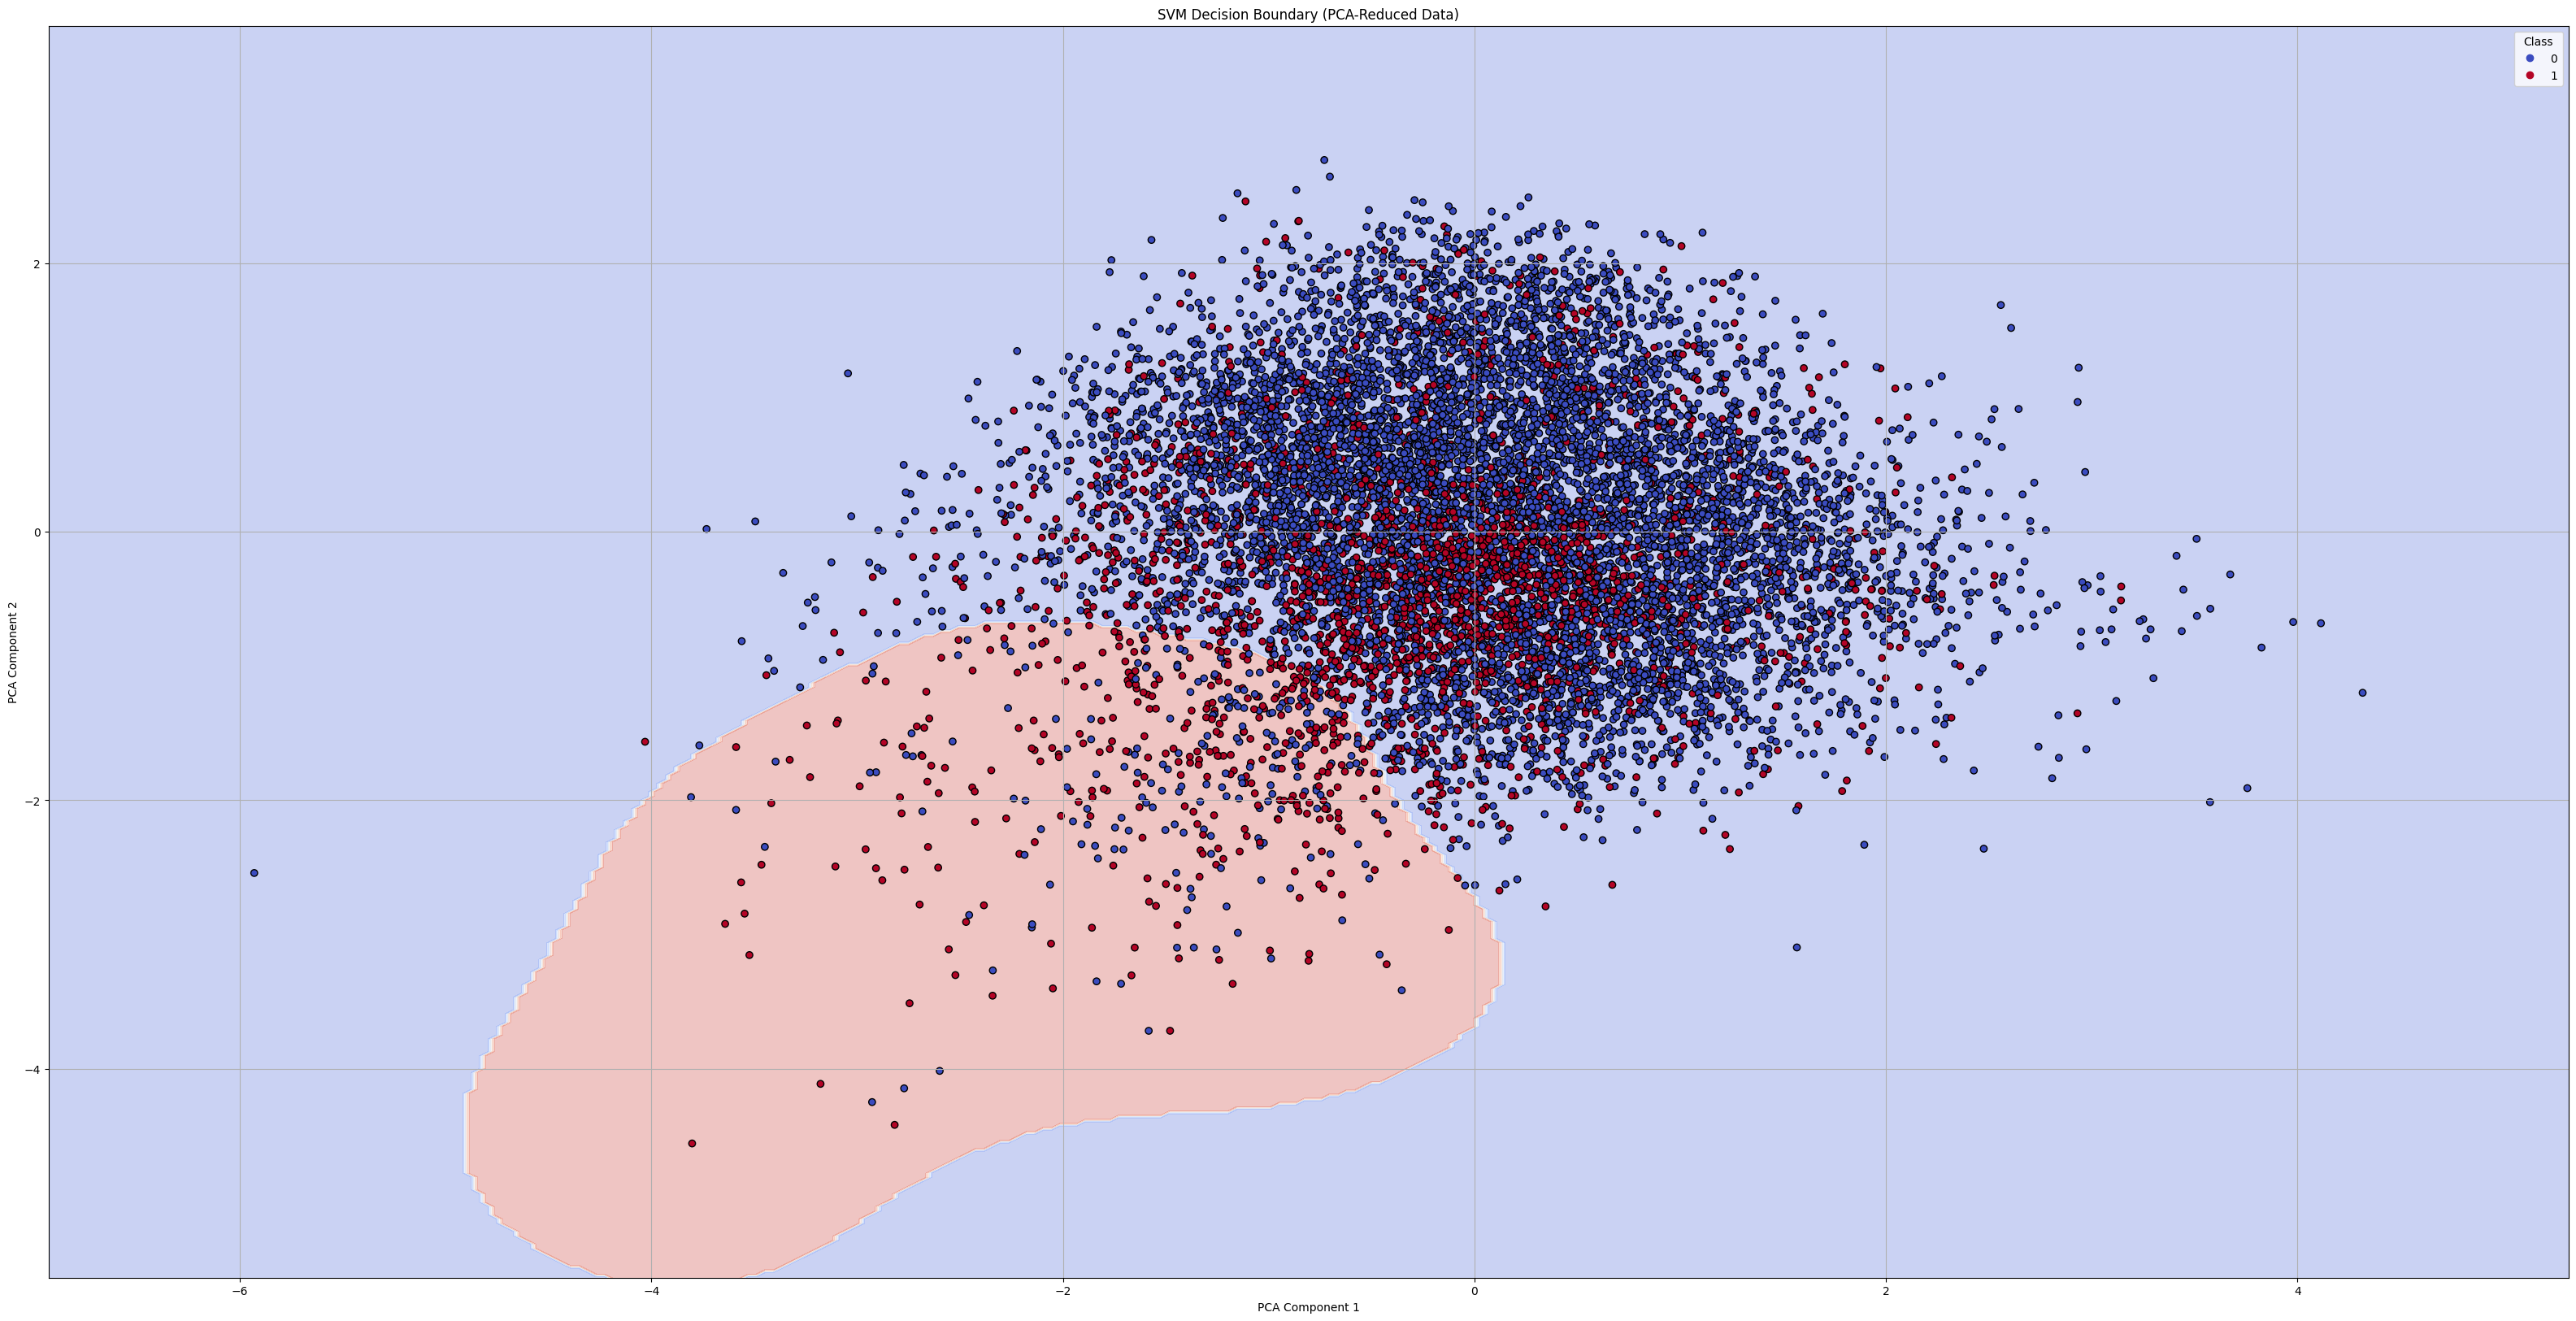

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

svm_vis = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_vis.fit(X_pca, Y)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(40, 20))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Decision Boundary (PCA-Reduced Data)")
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.show()